## Configuration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme()

## Preparation

In [2]:
train = pd.read_csv("train.csv", index_col='Id')
test = pd.read_csv("test.csv", index_col='Id')

X = pd.concat([train.drop('SalePrice', axis=1), test], axis=0)
y = train[['SalePrice']]

In [3]:
numeric_ = X.select_dtypes(exclude='object').drop(['MSSubClass'], axis=1).copy()
numeric_ = X.select_dtypes(exclude='object').drop(['MSSubClass'], axis=1).copy()
categorical_ = X.select_dtypes(include='object').copy()
categorical_['MSSubClass'] = X['MSSubClass']

disc_num_var = ['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']
cont_num_var = numeric_.drop(disc_num_var, axis=1).columns

## Understanding the data

A:\APLIKACJE\Python\venv_datascience\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


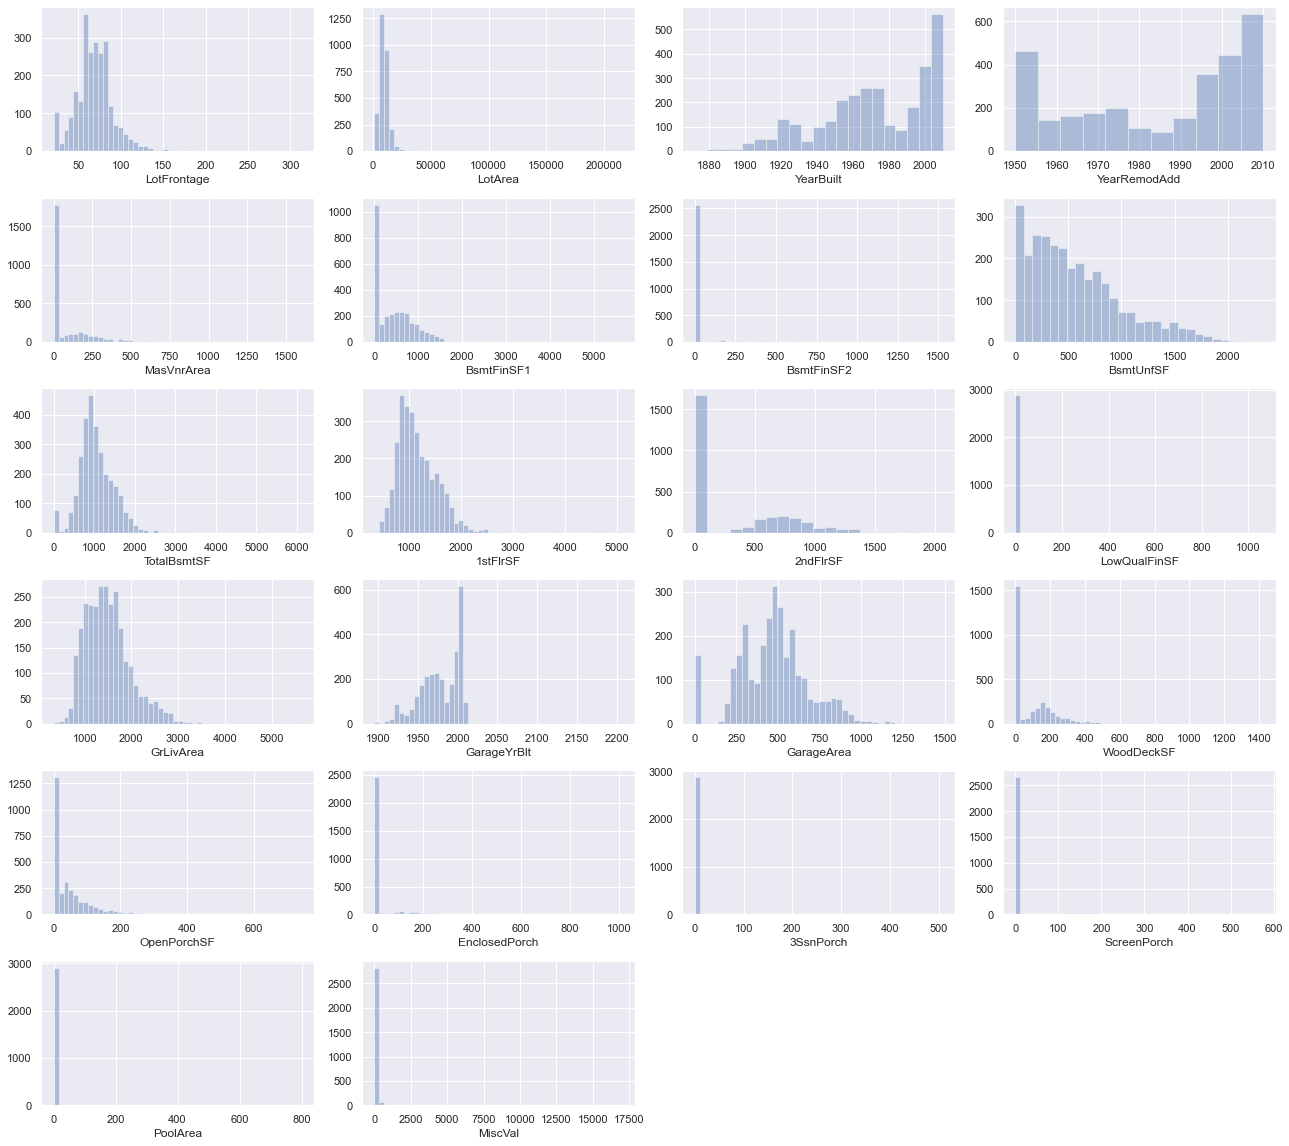

In [4]:
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(cont_num_var):
    plt.subplot(6,4,index+1)
    sns.distplot(numeric_.loc[:,col].dropna(), kde=False)
fig.tight_layout(pad=1.0)

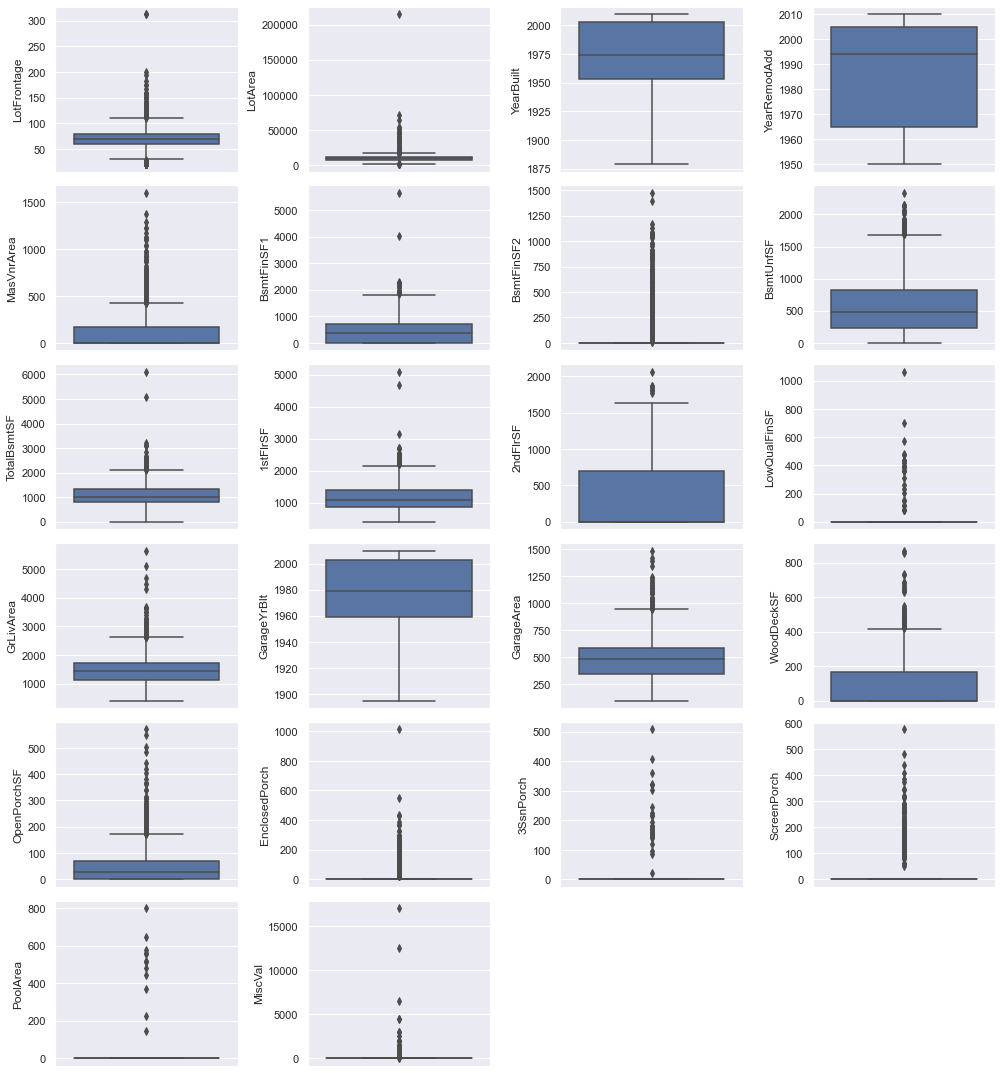

In [5]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(cont_num_var):
    plt.subplot(6,4,index+1)
    sns.boxplot(y=col, data=numeric_.dropna())
fig.tight_layout(pad=1.0)

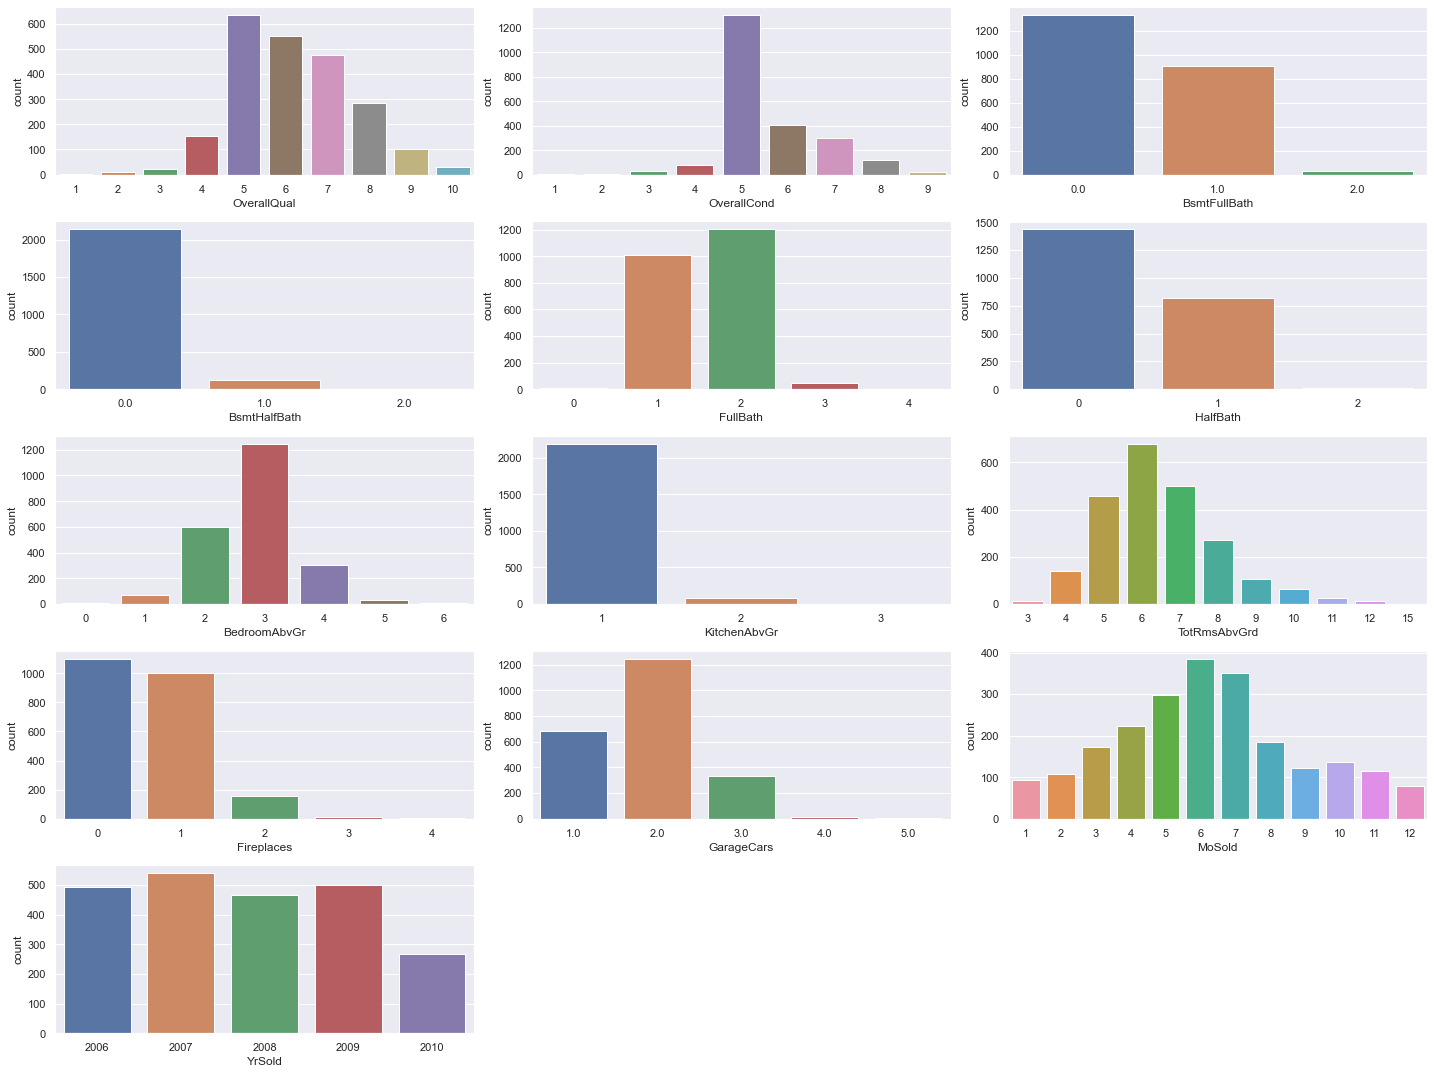

In [6]:
fig = plt.figure(figsize=(20,15))
for index,col in enumerate(disc_num_var):
    plt.subplot(5,3,index+1)
    sns.countplot(x=col, data=numeric_.dropna())
fig.tight_layout(pad=1.0)

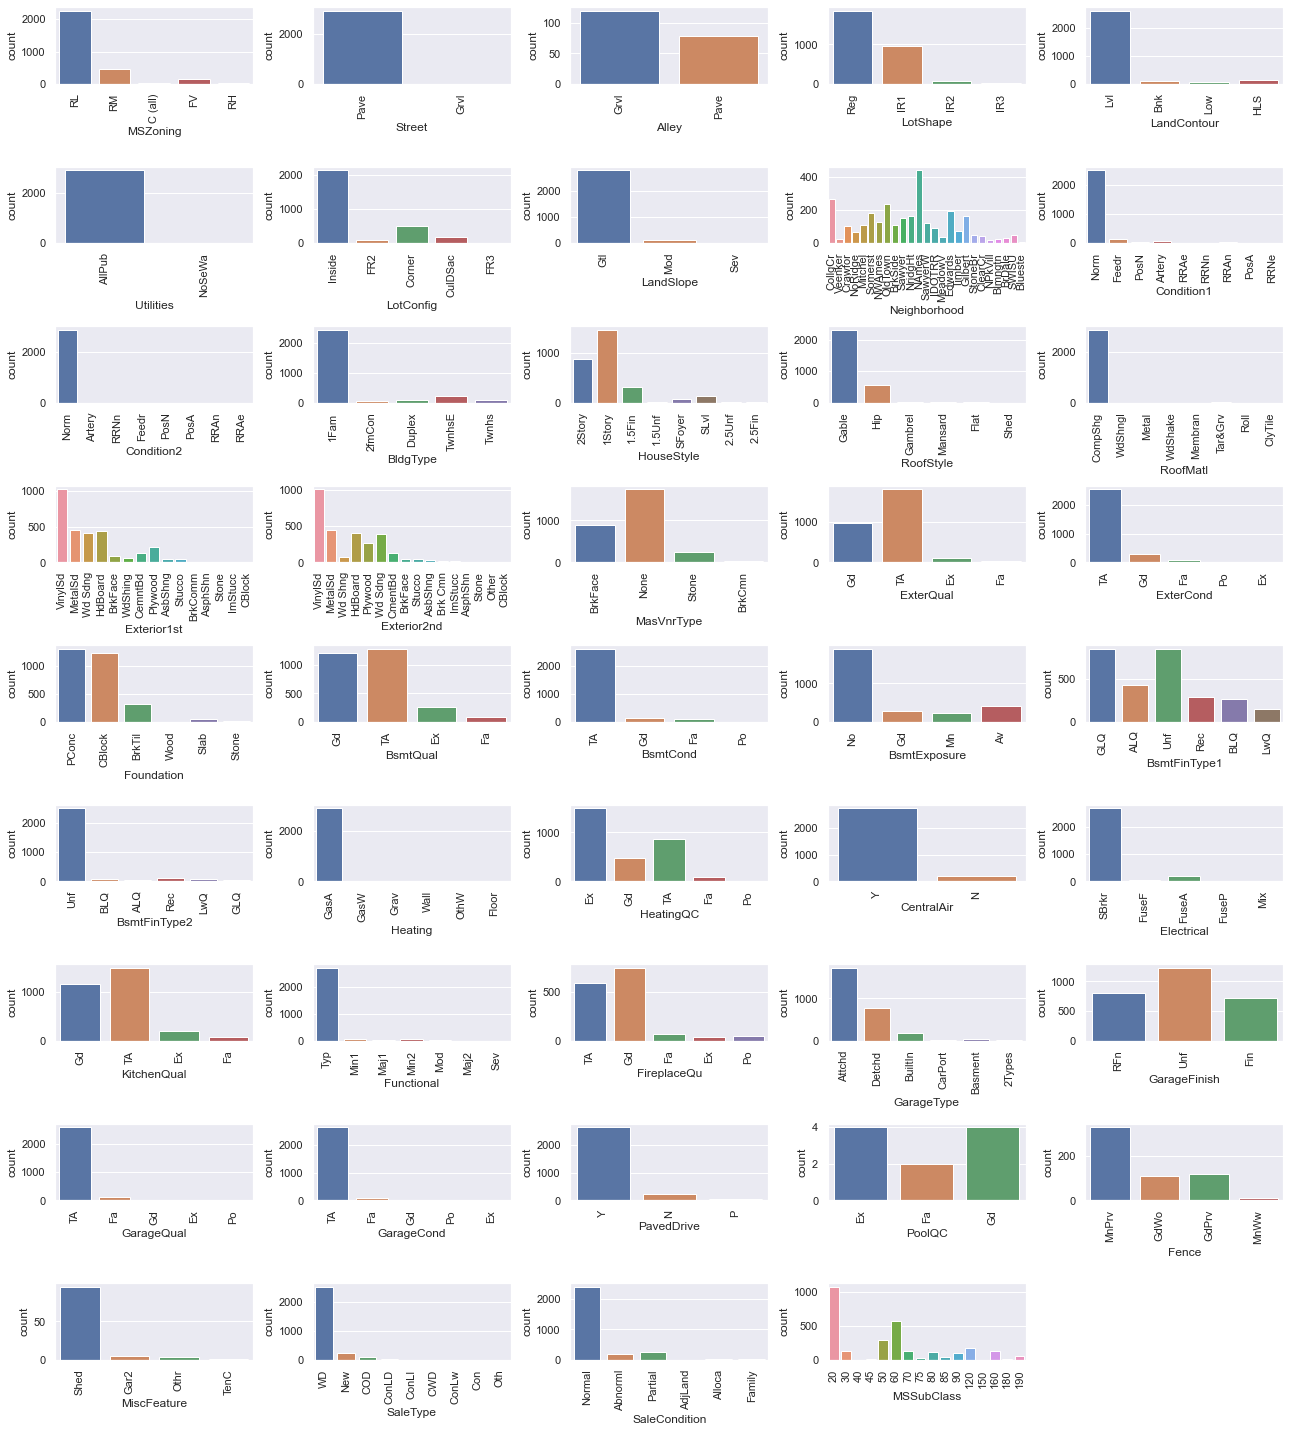

In [7]:
fig = plt.figure(figsize=(18,20))
for index in range(len(categorical_.columns)):
    plt.subplot(9,5,index+1)
    sns.countplot(x=categorical_.iloc[:,index], data=categorical_.dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

## Bi-Variate Analysis

<AxesSubplot:>

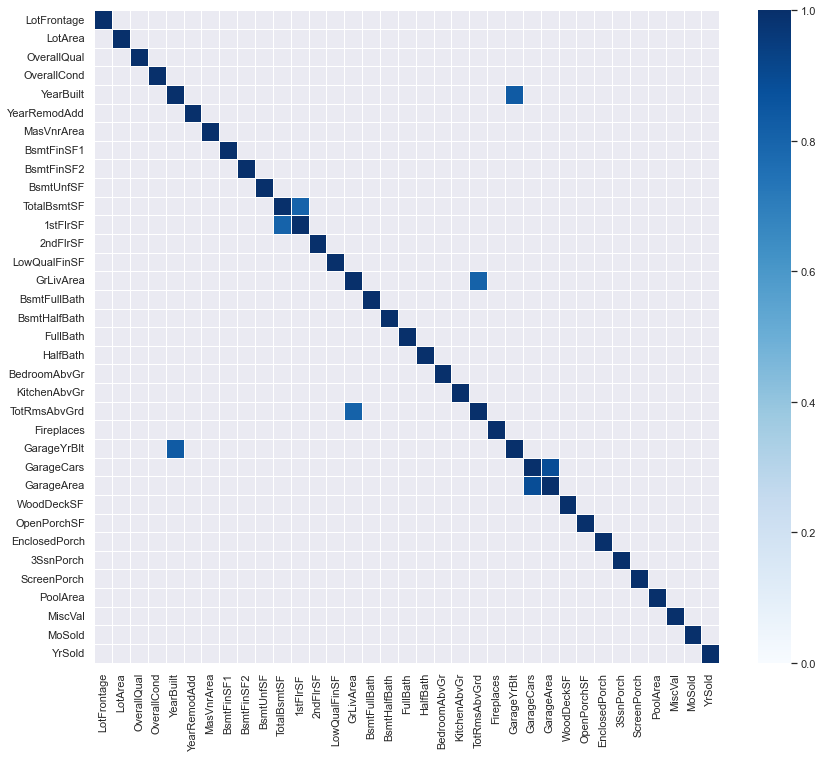

In [8]:
plt.figure(figsize=(14,12))
correlation = numeric_.corr()
sns.heatmap(correlation, mask=correlation < 0.8, linewidth=0.5, cmap='Blues', vmin=0)

In [9]:
numeric_train = train.select_dtypes(exclude=['object'])
correlation = numeric_train.corr()
correlation[['SalePrice']].sort_values(['SalePrice'], ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


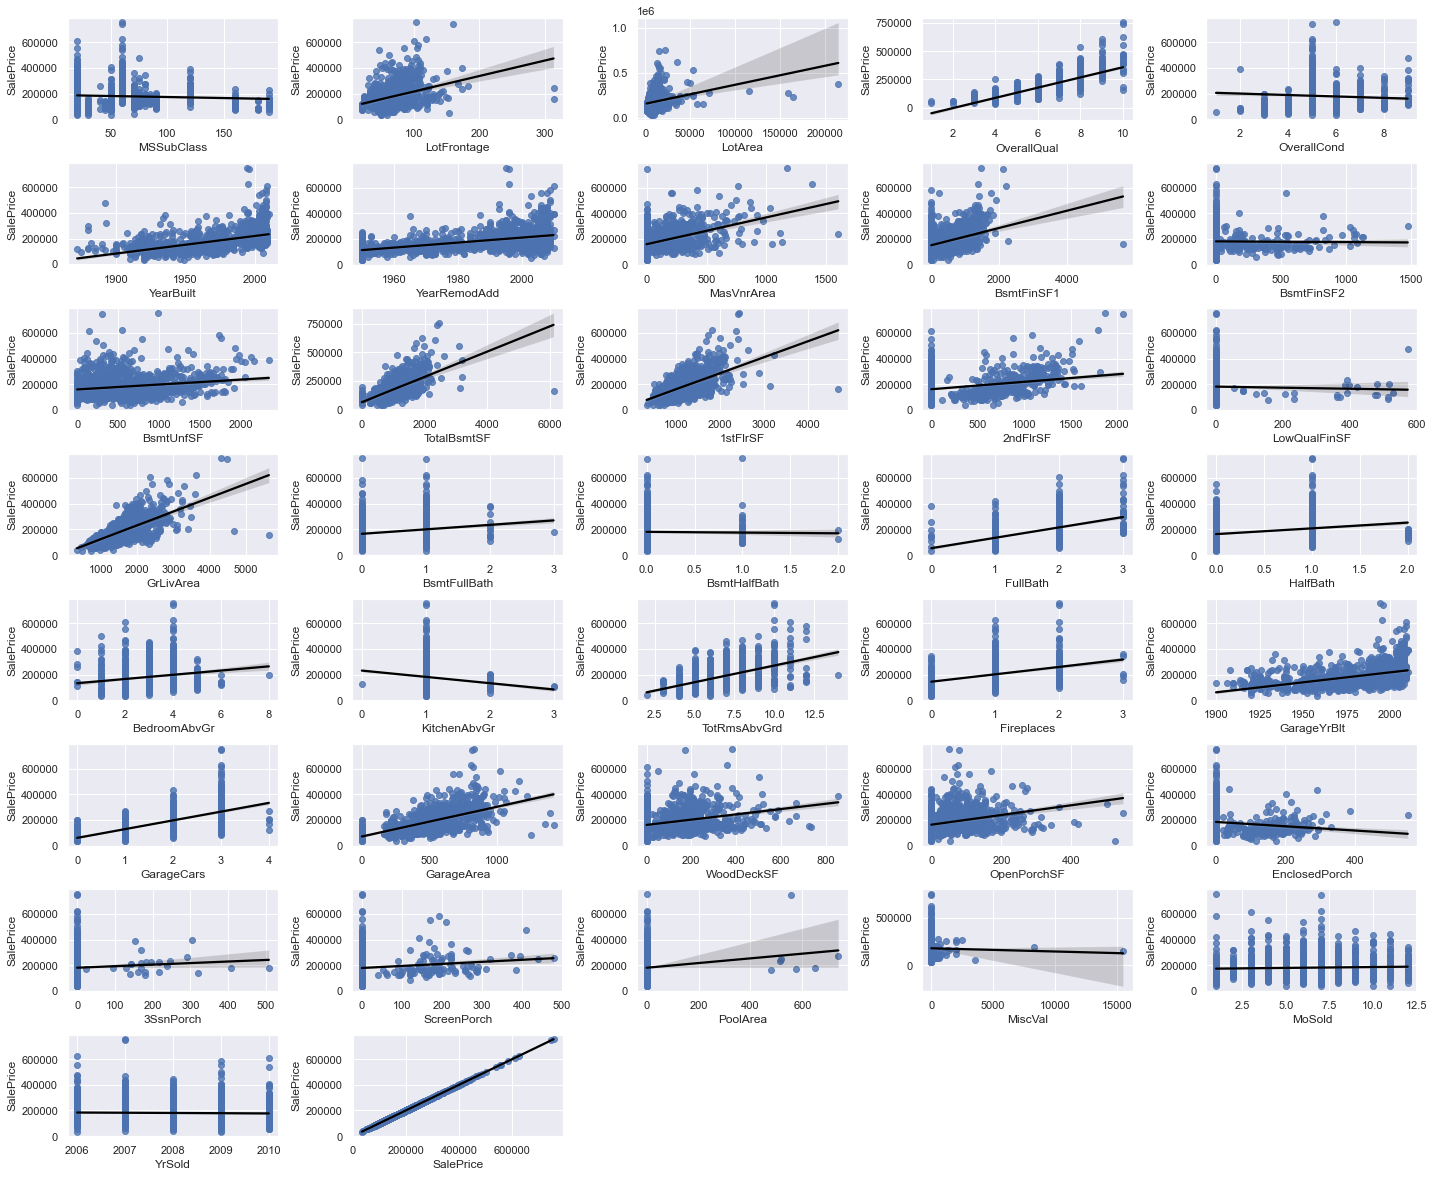

In [10]:
fig = plt.figure(figsize=(20,20))
for index in range(len(numeric_train.columns)):
    plt.subplot(10,5,index+1)
    sns.regplot(x=numeric_train.iloc[:,index], y='SalePrice', data=numeric_train, line_kws={'color':'black'})
fig.tight_layout(pad=1.0)

## Data Processing

In [11]:
X.drop(['GarageYrBlt', 'TotRmsAbvGrd', '1stFlrSF', 'GarageArea'], axis=1, inplace=True)

<AxesSubplot:title={'center':'Number of missing rows'}, xlabel='features', ylabel='sum'>

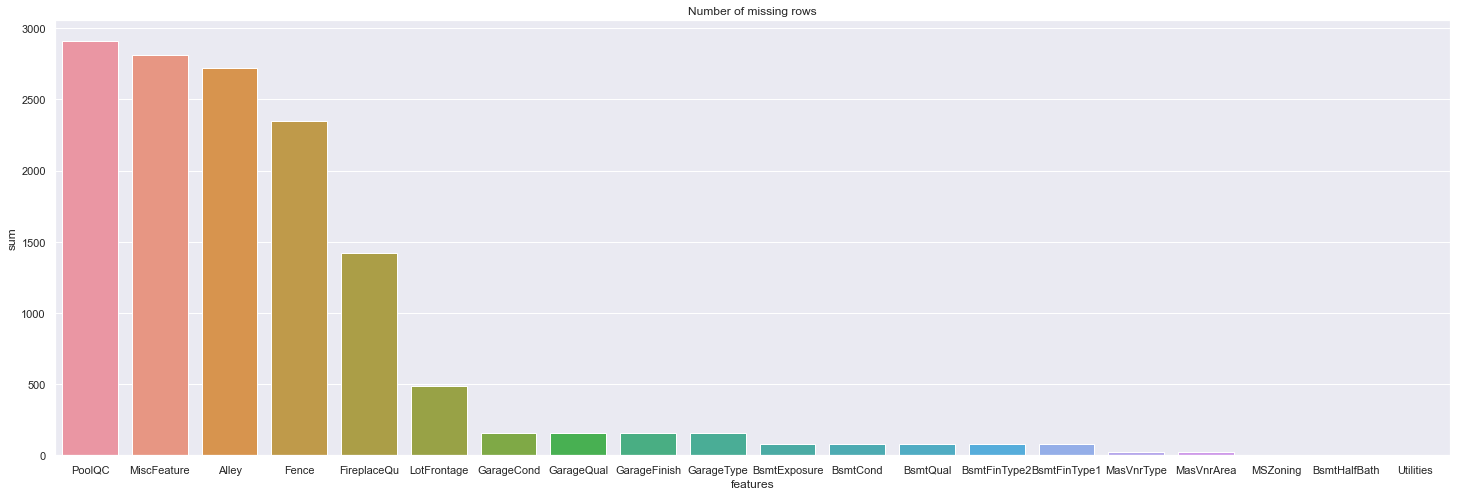

In [12]:
plt.figure(figsize=(25,8))
plt.title("Number of missing rows")
missing_count = pd.DataFrame(X.isnull().sum(), columns=['sum']).sort_values(by=['sum'], ascending=False).head(20).reset_index()
missing_count.columns = ['features', 'sum']
sns.barplot(x='features', y='sum', data=missing_count)

In [13]:
X.drop(['PoolQC', 'MiscFeature', 'Alley'], axis=1, inplace=True)

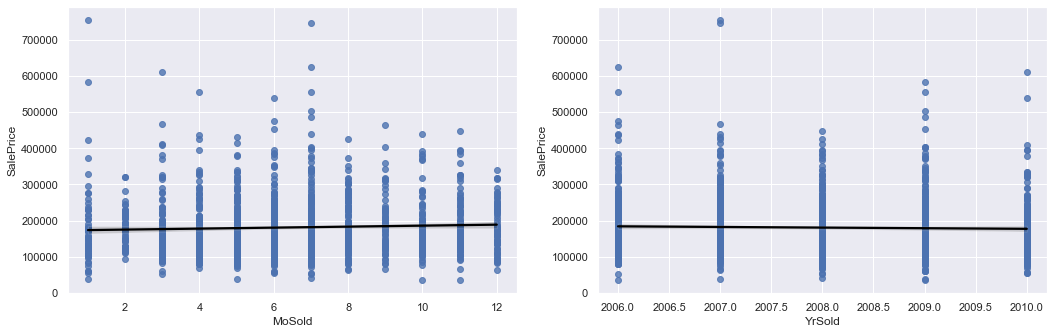

In [14]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.regplot(x=numeric_train['MoSold'], y='SalePrice', data=numeric_train, ax=axes[0], line_kws={'color':'black'})
sns.regplot(x=numeric_train['YrSold'], y='SalePrice', data=numeric_train, ax=axes[1], line_kws={'color':'black'})
fig.tight_layout(pad=2.0)

In [15]:
X.drop(['MoSold', 'YrSold'], axis=1, inplace=True)

In [16]:
cat_col = X.select_dtypes(include=['object']).columns
overfit_cat = []
for i in cat_col:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 96:
        overfit_cat.append(i)

overfit_cat = list(overfit_cat)
X = X.drop(overfit_cat, axis=1)

In [17]:
num_col = X.select_dtypes(exclude=['object']).drop(['MSSubClass'], axis=1).columns
overfit_num = []
for i in num_col:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 96:
        overfit_num.append(i)

overfit_num = list(overfit_num)
X = X.drop(overfit_num, axis=1)

In [18]:
print("Categorical Features with >96% of the same value:", overfit_cat)
print("Numerical Features with >96% of the same value:", overfit_num)

Categorical Features with >96% of the same value: ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating']
Numerical Features with >96% of the same value: ['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal']


In [19]:
train = train.drop(train[train['LotFrontage'] > 200].index)
train = train.drop(train[train['LotArea'] > 100000].index)
train = train.drop(train[train['BsmtFinSF1'] > 4000].index)
train = train.drop(train[train['TotalBsmtSF'] > 5000].index)
trainX = train.drop(train[train['GrLivArea'] > 4000].index)

In [20]:
X.shape

(2919, 61)

Missing values

In [21]:
pd.DataFrame(X.isnull().sum(), columns=['sum']).sort_values(['sum'], ascending=False).head(15)

,sum
Fence,2348
FireplaceQu,1420
LotFrontage,486
GarageFinish,159
GarageCond,159
GarageQual,159
GarageType,157
BsmtCond,82
BsmtExposure,82
BsmtQual,81


In [22]:
cat = ['GarageType','GarageFinish','BsmtFinType2','BsmtExposure','BsmtFinType1',
       'GarageCond','GarageQual','BsmtCond','BsmtQual','FireplaceQu','Fence',"KitchenQual",
       "HeatingQC",'ExterQual','ExterCond']
X[cat] = X[cat].fillna("NA")

In [42]:
cols = ["MasVnrType", "MSZoning", "Exterior1st", "Exterior2nd", "SaleType", "Electrical", "Functional"]
X[cols] = X.groupby("Neighborhood")[cols].transform(lambda x: x.fillna(x.mode()[0]))

KeyError: 'Neighborhood'

In [24]:
X.groupby("Neighborhood")

<AxesSubplot:xlabel='Neighborhood', ylabel='GarageCars_mean'>

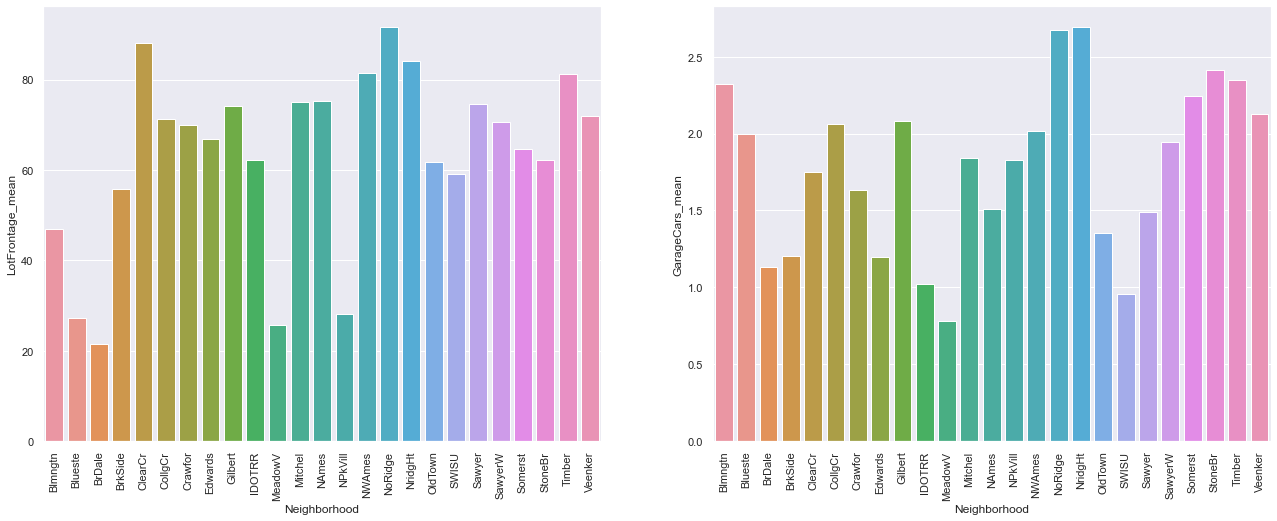

In [25]:
neigh_lot = X.groupby("Neighborhood")['LotFrontage'].mean().reset_index(name='LotFrontage_mean')
neigh_garage = X.groupby("Neighborhood")['GarageCars'].mean().reset_index(name='GarageCars_mean')

fig, axes = plt.subplots(1,2, figsize=(22,8))
axes[0].tick_params(axis='x', rotation=90)
sns.barplot(x='Neighborhood', y='LotFrontage_mean', data=neigh_lot, ax=axes[0])
axes[1].tick_params(axis='x', rotation=90)
sns.barplot(x='Neighborhood', y='GarageCars_mean', data=neigh_garage, ax=axes[1])

In [26]:
X['LotFrontage'] = X.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
X['GarageCars'] = X.groupby('Neighborhood')['GarageCars'].transform(lambda x: x.fillna(x.mean()))
X['MSZoning'] = X.groupby('Neighborhood')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

cont = ["BsmtHalfBath", "BsmtFullBath", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "MasVnrArea"]
X[cont] = X[cont].fillna(X[cont].mean())

In [27]:
X['MSSubClass'] = X['MSSubClass'].apply(str)

In [28]:
ordinal_map = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
fintype_map = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0}
expose_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
fence_map = {'GdPrv': 4,'MnPrv': 3,'GdWo': 2, 'MnWw': 1,'NA': 0}

In [29]:
ord_col = ['ExterQual','ExterCond','BsmtQual', 'BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond', 'FireplaceQu']
for col in ord_col:
    X[col] = X[col].map(ordinal_map)

fin_col = ['BsmtFinType1','BsmtFinType2']
for col in fin_col:
    X[col] = X[col].map(fintype_map)

X['BsmtExposure'] = X['BsmtExposure'].map(expose_map)
X['Fence'] = X['Fence'].map(fence_map)

## Feature Engineering

In [30]:
X['TotalLot'] = X['LotFrontage'] + X['LotArea']
X['TotalBsmtFin'] = X['BsmtFinSF1'] + X['BsmtFinSF2']
X['TotalSF'] = X['TotalBsmtSF'] + X['2ndFlrSF']
X['TotalBath'] = X['FullBath'] + X['HalfBath']
X['TotalPorch'] = X['OpenPorchSF'] + X['EnclosedPorch'] + X['ScreenPorch']

In [31]:
colum = ['MasVnrArea','TotalBsmtFin','TotalBsmtSF','2ndFlrSF','WoodDeckSF','TotalPorch']

for col in colum:
    col_name = col+'_bin'
    X[col_name] = X[col].apply(lambda x: 1 if x > 0 else 0)

In [32]:
X = pd.get_dummies(X)

A:\APLIKACJE\Python\venv_datascience\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Before transfomration of SalePrice'}, xlabel='SalePrice', ylabel='Density'>

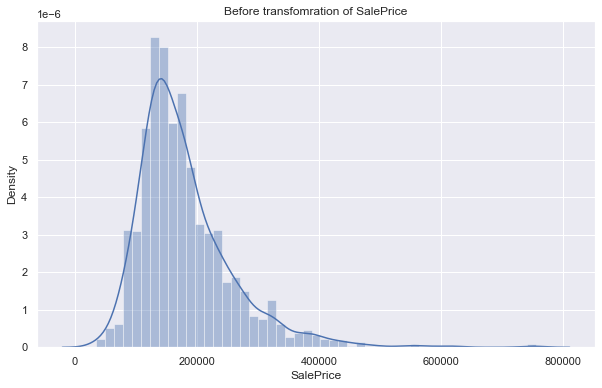

In [33]:
plt.figure(figsize=(10,6))
plt.title("Before transfomration of SalePrice")
sns.distplot(train['SalePrice'], norm_hist=False)

A:\APLIKACJE\Python\venv_datascience\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'After transfomration of SalePrice'}, xlabel='SalePrice', ylabel='Density'>

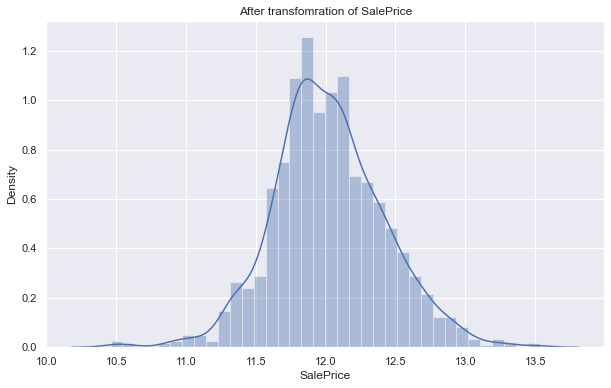

In [34]:
plt.figure(figsize=(10,6))
plt.title("After transfomration of SalePrice")
sns.distplot(np.log(train['SalePrice']), norm_hist=False)

In [35]:
y['SalePrice'] = np.log(y['SalePrice'])

## Modeling

In [36]:
x = X.loc[train.index]
y = y.loc[train.index]
test = X.loc[test.index]

In [37]:
from sklearn.preprocessing import RobustScaler

cols = x.select_dtypes(np.number).columns
transformer = RobustScaler().fit(x[cols])
x[cols] = transformer.transform(x[cols])
test[cols] = transformer.transform(test[cols])

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=2022)

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn import ensemble
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor

In [40]:
xgb = XGBRegressor(booster='gbtree', objective='reg:squarederror')

In [41]:
from sklearn.model_selection import RandomizedSearchCV

param_list = {
    'learning_rate': [0.001, 0.005, 0.1],
    'n_estimators': [3000,3500,4000],
    'max_depth': [1,3,4],
    'min_child_weight': [10],
    'reg_alpha': [0.05, 0.1, 0.2],
    'reg_lambda': [0.005, 0.01, 0.02]
}

xgb_reg = RandomizedSearchCV(estimator=xgb, param_distributions=param_list, n_iter=100, scoring='neg_root_mean_squared_error', cv=5)
xgb_search = xgb_reg.fit(X_train, y_train)

best_param = xgb_search.best_params_
xgb = XGBRegressor(**best_param)

KeyboardInterrupt: 

In [ ]:
best_param

In [ ]:
lgbm = LGBMRegressor(boosting_type='gbdt',objective='regression', max_depth=-1,
                    lambda_l1=0.0001, lambda_l2=0, learning_rate=0.1,
                    n_estimators=100, max_bin=200, min_child_samples=20,
                    bagging_fraction=0.75, bagging_freq=5,
                    bagging_seed=7, feature_fraction=0.8,
                    feature_fraction_seed=7, verbose=-1)

In [ ]:
param_lst = {
    'max_depth' : [2, 5, 8, 10],
    'learning_rate' : [0.001, 0.01, 0.1, 0.2],
    'n_estimators' : [100, 300, 500, 1000, 1500],
    'lambda_l1' : [0.0001, 0.001, 0.01],
    'lambda_l2' : [0, 0.0001, 0.001, 0.01],
    'feature_fraction' : [0.4, 0.6, 0.8],
    'min_child_samples' : [5, 10, 20, 25]
}

lightgbm = RandomizedSearchCV(estimator = lgbm, param_distributions = param_lst,
                              n_iter = 100, scoring = 'neg_root_mean_squared_error',
                              cv = 5)

lightgbm_search = lightgbm.fit(X_train, y_train)

# LightBGM with tuned hyperparameters
best_param = lightgbm_search.best_params_
lgbm = LGBMRegressor(**best_param)

In [ ]:
cb = CatBoostRegressor(loss_function='RMSE', logging_level='Silent')

In [ ]:
param_lst = {
    'n_estimators' : [100, 300, 500, 1000, 1300, 1600],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'l2_leaf_reg' : [0.001, 0.01, 0.1],
    'random_strength' : [0.25, 0.5 ,1],
    'max_depth' : [3, 6, 9],
    'min_child_samples' : [2, 5, 10, 15, 20],
    'rsm' : [0.5, 0.7, 0.9],

}

catboost = RandomizedSearchCV(estimator = cb, param_distributions = param_lst,
                              n_iter = 100, scoring = 'neg_root_mean_squared_error',
                              cv = 5)

catboost_search = catboost.fit(X_train, y_train)

# CatBoost with tuned hyperparams
best_param = catboost_search.best_params_
cb = CatBoostRegressor(logging_level='Silent', **best_param)

In [ ]:
def mean_cross_val(model, X, y):
    score = cross_val_score(model, X, y, cv=5)
    mean = score.mean()
    return mean

xgb.fit(X_train, y_train)
preds = xgb.predict(X_val)
preds_test_xgb = xgb.predict(test)
mae_xgb = mean_absolute_error(y_val, preds)
rmse_xgb = np.sqrt(mean_squared_error(y_val, preds))
score_xgb = xgb.score(X_val, y_val)
cv_xgb = mean_cross_val(xgb, x, y)

lgbm.fit(X_train, y_train)
preds = lgbm.predict(X_val)
preds_test_lgbm = lgbm.predict(test)
mae_lgbm = mean_absolute_error(y_val, preds)
rmse_lgbm = np.sqrt(mean_squared_error(y_val, preds))
score_lgbm = lgbm.score(X_val, y_val)
cv_lgbm = mean_cross_val(lgbm, x, y)

cb.fit(X_train, y_train)
preds = cb.predict(X_val)
preds_test_cb = cb.predict(test)
mae_cb = mean_absolute_error(y_val, preds)
rmse_cb = np.sqrt(mean_squared_error(y_val, preds))
score_cb = cb.score(X_val, y_val)
cv_cb = mean_cross_val(cb, x, y)

In [ ]:
model_perfomances = pd.DataFrame({
    "Model" : ["XGBoost", "LGBM", "CatBoost"],
    "CV(5)" : [str(cv_xgb)[0:5], str(cv_lgbm)[0:5], str(cv_cb)[0:5]],
    "MAE" : [str(mae_xgb)[0:5], str(mae_lgbm)[0:5], str(mae_cb)[0:5]],
    "RMSE" : [str(rmse_xgb)[0:5], str(rmse_lgbm)[0:5], str(rmse_cb)[0:5]],
    "Score" : [str(score_xgb)[0:5], str(score_lgbm)[0:5], str(score_cb)[0:5]],
})

print("Sorted by Score:")
print(model_perfomances.sort_values(by="Score", ascending=False))

In [ ]:
def blend_models_predict(X, b, c, d):
    return ((b* xgb.predict(X)) + (c * lgbm.predict(X)) + (d * cb.predict(X)))

In [ ]:
subm = np.exp(blend_models_predict(test, 0.5, 0.4, 0.1))
submission = pd.DataFrame({'Id': test.index,
                           'SalePrice': subm})

submission.to_csv("submission.csv", index=False)